In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mtdnetwork.network as network
import mtdnetwork.hacker as hacker

from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.osshuffle import OSShuffle
from mtdnetwork.mtd.serviceshuffle import ServiceShuffle
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle

import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

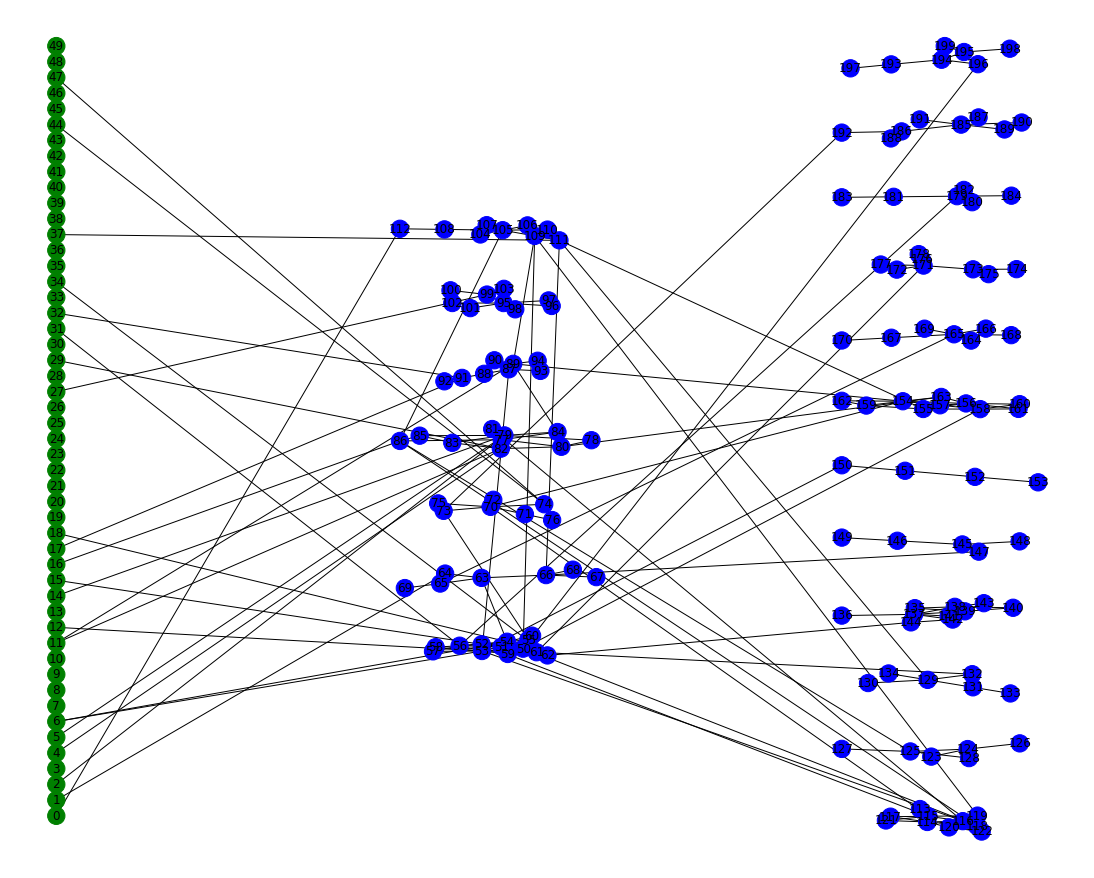

In [15]:
test_network = network.Network(200, 50, 20, 3)
# test_network.register_mtd(PortShuffle)
# test_network.register_mtd(IPShuffle)
# test_network.register_mtd(OSShuffle)
# test_network.register_mtd(ServiceShuffle)
# test_network.register_mtd(UserShuffle)
# test_network.register_mtd(HostTopologyShuffle)
# test_network.register_mtd(CompleteTopologyShuffle)
test_network.draw()

In [16]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 761,
 'Initial Vulns Per OS': {'windows': {'8.1': 16,
   'vista': 44,
   '8': 7,
   '10': 14,
   '7': 8,
   'xp': 107},
  'ubuntu': {'14.04': 32,
   '16.04': 41,
   '20.04': 12,
   '18.04': 25,
   '12.04': 7,
   '10.04': 58},
  'freebsd': {'12': 28, '8': 138, '10': 24, '9': 10, '13': 13, '11': 10},
  'centos': {'8': 9, '7': 16, '3': 108, '6': 30, '5': 4}},
 'Average Initial RoA Per OS': {'windows': {'8.1': 0.04361959589591786,
   'vista': 0.040904823055225664,
   '8': 0.02877708719608234,
   '10': 0.029417170006360953,
   '7': 0.255172707968756,
   'xp': 0.058694988227140914},
  'ubuntu': {'14.04': 0.1646189656013481,
   '16.04': 0.05962809885063306,
   '20.04': 0.034029296765543095,
   '18.04': 0.0808936017830589,
   '12.04': 0.03789723193498453,
   '10.04': 0.06339267842044922},
  'freebsd': {'12': 0.08986367457386132,
   '8': 0.05902708624518164,
   '10': 0.07790671777588919,
   '9': 0.04267371074903567,
   '13': 0.05498930065027253,
   '11': 0.0418

In [17]:
adversary = hacker.Hacker(test_network)

In [18]:
curr_time = 0
time_step = 1
for curr_time in range(200000):
    test_network.step(curr_time)
    adversary.step(curr_time)
    if adversary.done:
        break
print("DONE")
print("TIME:", curr_time)

INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:15:freebsd:12
INFO:vuln-9552ed63-7078-47c5-b16e-742a48edc139:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:52:windows:8.1
INFO:mtdnetwork.hacker:VULN COMPROMISE:16:ubuntu:16.04
INFO:vuln-7b47c74e-7550-46b3-9a26-d83c632c6f82:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:vuln-110254e7-a946-41ec-bd1d-af2cf1cd6ee9:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:27:windows:vista
INFO:vuln-9a11c835-74db-4edb-aff6-a8e23a452163:OS DEPENDENT VULNERABILITY EXPLOITED!
INFO:mtdnetwork.hacker:VULN COMPROMISE:42:ubuntu:12.04
INFO:mtdnetwork.hacker:VULN COMPROMISE:48:windows:vista
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacker:VULN COMPROMISE:5:windows:vista
INFO:mtdnetwork.hacker:VULN COMPROMISE:21:freebsd:8
INFO:mtdnetwork.hacker:VULN COMPROMISE:43:freebsd:10
INFO:mtdnetwork.hacker:SCANNING NETWORK FOR HOSTS
INFO:mtdnetwork.hacke

DONE
TIME: 199999


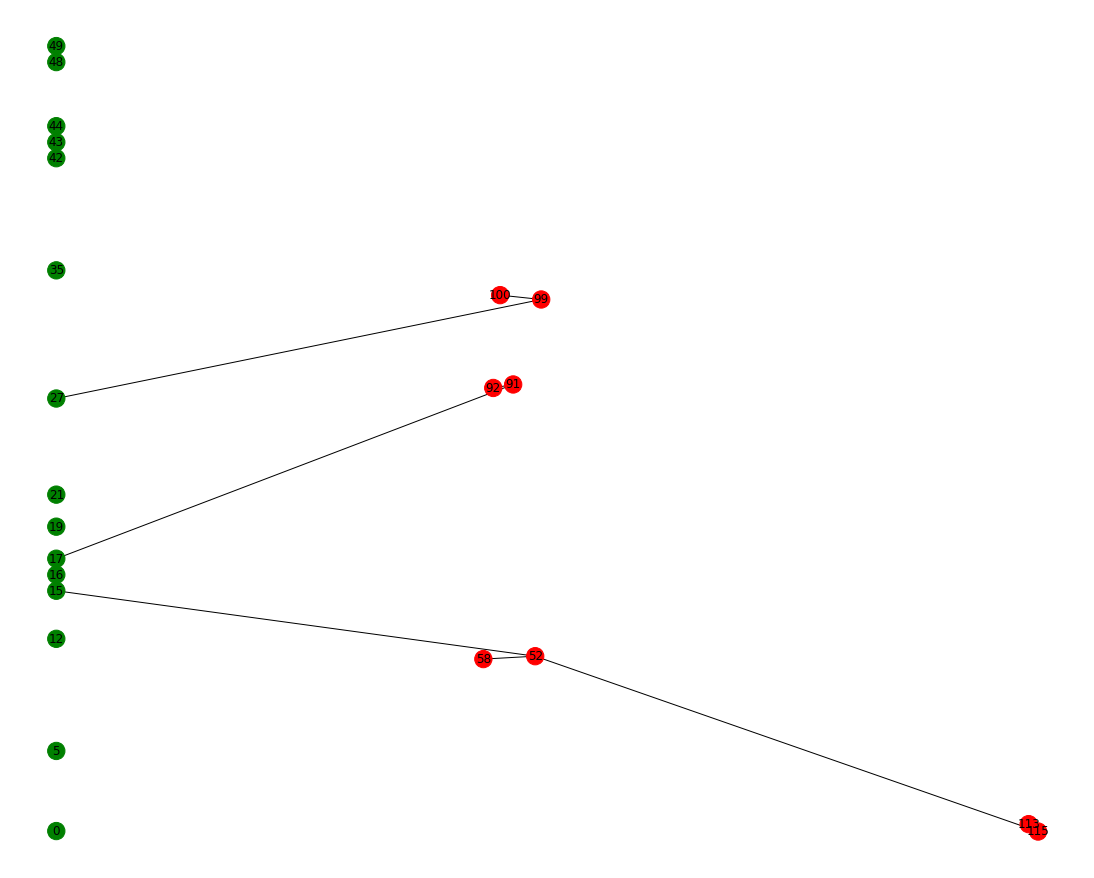

In [19]:
test_network.draw_compromised(adversary.compromised_hosts)

In [20]:
test_network.get_statistics()

{'Total Initial Vulnerabilities': 761,
 'Initial Vulns Per OS': {'windows': {'8.1': 16,
   'vista': 44,
   '8': 7,
   '10': 14,
   '7': 8,
   'xp': 107},
  'ubuntu': {'14.04': 32,
   '16.04': 41,
   '20.04': 12,
   '18.04': 25,
   '12.04': 7,
   '10.04': 58},
  'freebsd': {'12': 28, '8': 138, '10': 24, '9': 10, '13': 13, '11': 10},
  'centos': {'8': 9, '7': 16, '3': 108, '6': 30, '5': 4}},
 'Average Initial RoA Per OS': {'windows': {'8.1': 0.04361959589591786,
   'vista': 0.040904823055225664,
   '8': 0.02877708719608234,
   '10': 0.029417170006360953,
   '7': 0.255172707968756,
   'xp': 0.058694988227140914},
  'ubuntu': {'14.04': 0.1646189656013481,
   '16.04': 0.05962809885063306,
   '20.04': 0.034029296765543095,
   '18.04': 0.0808936017830589,
   '12.04': 0.03789723193498453,
   '10.04': 0.06339267842044922},
  'freebsd': {'12': 0.08986367457386132,
   '8': 0.05902708624518164,
   '10': 0.07790671777588919,
   '9': 0.04267371074903567,
   '13': 0.05498930065027253,
   '11': 0.0418

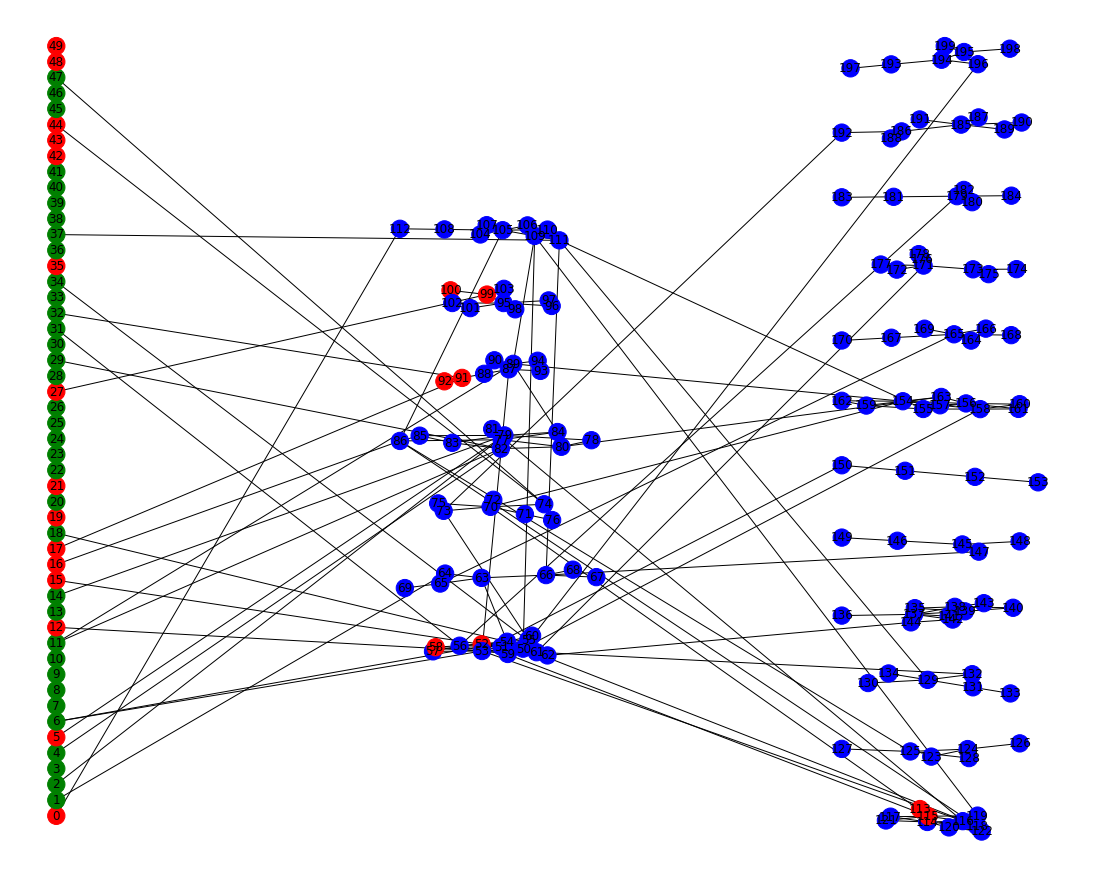

In [21]:
test_network.draw()

In [10]:
adversary.observed_changes

{mtdnetwork.exceptions.PortsOnHostChangeError: 44,
 mtdnetwork.exceptions.HostIPChangeError: 46}